In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json
from scipy.stats import multivariate_normal

/Users/deepprakashravi/.conda/envs/general-env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Path to the JSON file
file_path = './gmm_data.json'

# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Now `data` is a Python dictionary containing the parsed JSON
print(data)

{'weights': [0.1593665920244475, 0.17418256804302296, 0.2891964821910339, 0.14392185374025576, 0.15555119030887402, 0.07778131369236577], 'means': [[3.728195517845301, 0.4667780040764613, -0.3836866910161931, 0.13156399452705764, -0.03388809901037677, -0.0851763763397403, 0.06723906998415792, -0.014183463002105214], [1.0267929144882495, 0.5572633807875571, -0.5333725647651965, 0.004646699080013541, 0.04916615143564825, 0.03316686227322126, -0.020015125599102956, 0.012410353241816215], [-3.8927925715996614, -0.42776288555030156, 0.08655548730129474, 0.002728938391735695, 0.02531221604929197, -0.009561348258684188, 0.01313200549125053, 0.012593682632692605], [-2.705606433970739, -0.031147824538615015, -0.20869753880888214, -0.08008699575653214, -0.11327049226981573, -0.0004088174887541157, -0.005599372114697454, -0.013715374421187287], [-0.7672664532352222, 1.4410619180502522, 1.0764321459295614, -0.008894892794914467, -0.010143482443148747, 0.0128064499076289, -0.00030430323598449905, -

In [3]:
for key, values in data.items():
    print(key)

weights
means
cov


In [4]:
means=[]
covariances=[]
for i in range(len(data["means"])):
    means.append(data["means"][i])
    covariances.append(data["cov"][i])

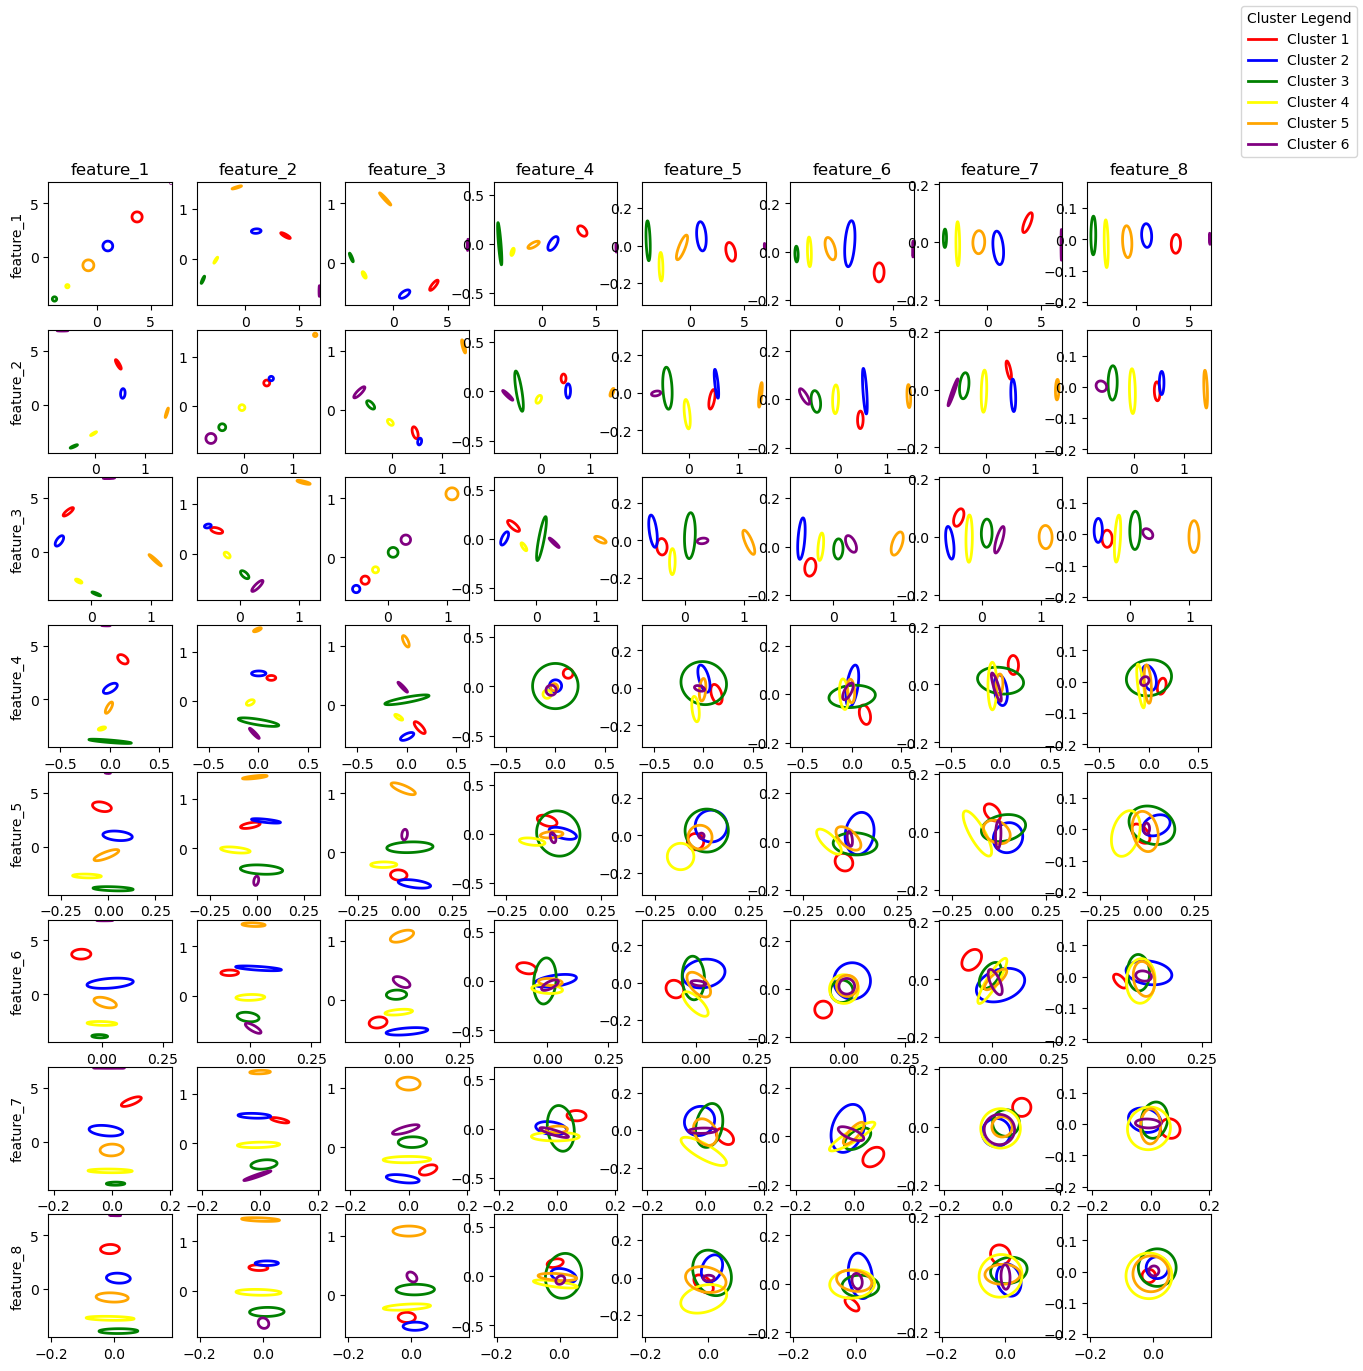

In [5]:


K = len(data["weights"])# Number of cluster
D = len(means[0])  # 8 Dimesion of feature space

n =3 # how far in terms of std you want to plot

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=D, ncols=D, figsize=(15, 15))
label_to_color = { 0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'orange', 5: 'purple'}

for i in range(K):
    # Create different plot of each cluster
    for j in range(D):
        for k in range(D):
            if j==k:
                mean_ = np.array([means[i][j],means[i][k]])
                cov_  = np.diag([covariances[i][j][j], covariances[i][k][k]])
                
                # Create a grid of points
                x, y = np.meshgrid(np.linspace(mean_[0] -n * np.sqrt(cov_[0][0]), mean_[0] +n * np.sqrt(cov_[0][0]), 1000), np.linspace(mean_[1]-n * np.sqrt(cov_[1][1]), mean_[1]+ n * np.sqrt(cov_[1][1]), 1000))
                pos = np.dstack((x, y))
                # Create the multivariate normal distribution
                rv = multivariate_normal(mean_, cov_)
                # Compute the probability density function (PDF) at the grid points
                pdf = rv.pdf(pos)
                axes[j][k].contour(x, y, pdf, levels=1,colors=label_to_color[i], linewidths=2)
                
                
            else:
                mean_ = np.array([means[i][j],means[i][k]])
                cov_  = np.array([[covariances[i][j][j],covariances[i][j][k]],[covariances[i][k][j], covariances[i][k][k]]])
                
                # Create a grid of points
                x, y = np.meshgrid(np.linspace(mean_[0] -n * np.sqrt(cov_[0][0]), mean_[0] +n * np.sqrt(cov_[0][0]), 1000), np.linspace(mean_[1]-n * np.sqrt(cov_[1][1]), mean_[1]+ n * np.sqrt(cov_[1][1]), 1000))
                pos = np.dstack((x, y))
                # Create the multivariate normal distribution
                rv = multivariate_normal(mean_, cov_)
                # Compute the probability density function (PDF) at the grid points
                pdf = rv.pdf(pos)
                axes[j][k].contour(x, y, pdf, levels=1, colors=label_to_color[i], linewidths=2)
                
            #
                
            if j==0:
                axes[j][k].set_title(f'feature_{k+1}')
            if k==0:
                axes[j][k].set_ylabel(f'feature_{j+1}')
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=color, lw=2, label=f'Cluster {i + 1}')
                   for i, color in label_to_color.items()]
# Add a legend
lines = [] 
labels = [] 
  
for ax in fig.axes: 
    Line, Label = ax.get_legend_handles_labels() 
    lines.extend(Line) 
    labels.extend(Label)
fig.legend(handles=legend_elements, loc='upper right', title='Cluster Legend')

plt.show() 

In [35]:
alpha = 1e-8
for i in range(6):
    A= np.array(data["cov"][i])
    #print(np.min(alpha *A), np.max(alpha *A))
    eigen_values = np.linalg.eigvals(alpha *A)
    print(np.max(eigen_values), np.min(eigen_values))

1.698735500061013e-09 6.545018185589104e-14
1.8408463735596945e-09 6.02415503078706e-13
8.300804046074057e-10 1.8246674384039113e-13
2.9997720915062645e-10 6.43122829955362e-14
2.382441251491323e-09 1.0094141489210897e-16
1.8695060299497452e-10 8.541739961085193e-15
